<a href="https://colab.research.google.com/github/prof-pccarvalho/-Construindo-um-Sistema-de-Hospedagem-de-um-Hotel-no-C-/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_Analise_Exploratoria_de_Dados_TRABALHO_EM_GRUPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados (EDA - *Exploratory Data Analysis*)
  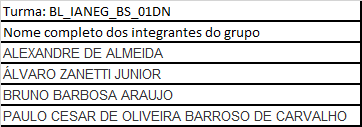

**Descrição do Problema:**
Análise de Fatores de Risco para Doenças Cardíacas (Dataset: Heart Disease)

**Insights de Negócio**
"Quais indicadores clínicos e demográficos estão mais fortemente associados à presença de doença cardíaca?"

**Pergunta de Negócio: Qual é o impacto quantitativo dos fatores de risco clínicos (e.g., pressão arterial, colesterol, tipo de dor no peito) na severidade do diagnóstico de doença cardíaca (variável num)?**

O objetivo do modelo será a **predição** do valor contínuo da severidade da doença (num), permitindo à gestão de saúde estratificar e quantificar o risco dos pacientes.

**Justificativa da Escolha do Dataset: Heart Disease**
O dataset Doença Cardíaca, doado em 30/06/1988, é uma coleção de dados multivariados crucialmente relevante para a área de Saúde e Medicina. Ele contém 303 instâncias e 13 características (embora o banco de dados original contivesse 76 atributos, a comunidade de ML foca em 14).
**1.** **Relevância do Problema Analisado (Diagnóstico e Risco):** O problema central abordado por este dataset é o diagnóstico de doença cardíaca. O campo alvo (target), denominado num (o alvo num), refere-se à presença de doença cardíaca no paciente. Ele é um valor inteiro que varia de 0 (sem presença) a 4 (presença de doença cardíaca, tipicamente estreitamento do diâmetro dos vasos).
**2.** Esta é uma tarefa classicamente associada à **Classificação** no Aprendizado Supervisionado, onde o objetivo é distinguir a presença (valores 1, 2, 3 e 4) da ausência (valor 0) da doença.
**3.** **Natureza dos Fatores de Risco:** O dataset permite a análise de fatores preditivos (características), que são os riscos associados à condição cardíaca. As variáveis incluem atributos **categóricos** e **inteiros/reais**, como:
    ◦ **Demográficos/Comportamentais:** Idade (age), sexo (sex).
    ◦ **Clínicos e Fisiológicos:** Pressão arterial em repouso (trestbps) em mm Hg, colesterol sérico (col ou chol) em mg/dl, glicemia de jejum (fbs), e frequência cardíaca máxima alcançada (thalach).
    ◦ **Sintomas/Resultados de Exames:** Tipo de dor no peito (cp) e angina induzida por exercício (exang).
**4.** A análise desses atributos permite identificar quais deles têm **maior impacto** sobre o diagnóstico final (o alvo num), um processo que envolve a modelagem experimental para prever o valor de uma variável de interesse.

**Conexão com Desafios de Negócios e Tomada de Decisão (Saúde)**
No contexto de Saúde e Medicina, a capacidade de prever a presença de doença cardíaca e quantificar os fatores de risco associados é crucial para a gestão clínica e a administração de saúde:

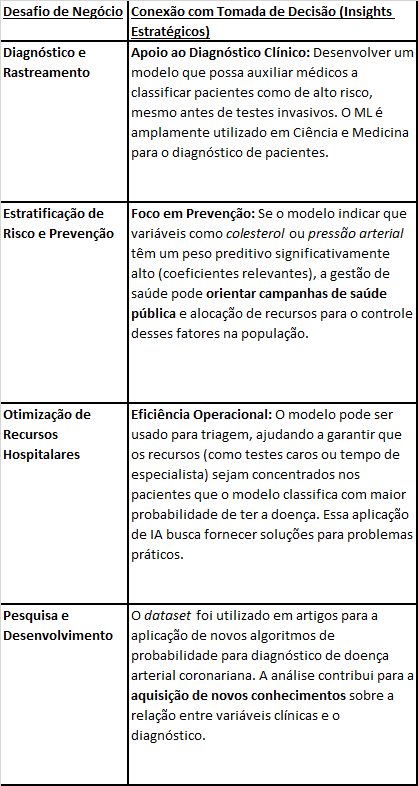

Portanto, a escolha do dataset Doença Cardíaca permite desenvolver um modelo preditivo robusto (seja de **Classificação**, que é a tarefa natural do target (num), ou de Regressão, conforme o requisito técnico do projeto), que fornece insights estratégicos claros sobre **risco e diagnóstico**, alinhando a dimensão técnica com a perspectiva estratégica necessária para a **tomada de decisão** no ambiente empresarial de saúde.

## 1. Importar bibliotecas necessárias

Vamos importar as principais bibliotecas para fazer análise exploratória e manipulação de dados em Python: `pandas`, `numpy`, `matplotlib,pyplot`, `seaborn`, `ydata-profiling`, entre outras abaixo listadas.

In [ ]:
# Ignora avisos desnecessários durante a execução
import os, warnings
os.environ["PYTHONWARNINGS"] = "ignore::DeprecationWarning"
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
# ==============================================
# Instalar bibliotecas necessárias (se precisar)
# ==============================================

!pip install -q seaborn scipy scikit-learn ydata-profiling sweetviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
# ============================
# Importar as bibliotecas
# ============================

# Manipulação e análise de dados (criação de DataFrames, leitura de CSV, etc.)
import pandas as pd

# Manipulação de vetores, matrizes e operações numéricas de alto desempenho
import numpy as np

# Teste estatístico de normalidade (Shapiro-Wilk)
from scipy.stats import shapiro

# Estatística descritiva, distribuições de probabilidade e testes de hipótese
import scipy.stats as stats

# Visualização básica de gráficos
import matplotlib.pyplot as plt

# Visualização estatística mais estilizada (baseada em matplotlib)
import seaborn as sns

# Geração automática de relatórios de Análise Exploratória de Dados (EDA)
from ydata_profiling import ProfileReport

# Path simplifica o trabalho com caminhos de arquivos e pastas
from pathlib import Path

# Tratamento de valores ausentes (NaN), substituir dados faltantes por média, mediana, moda ou um valor constante
# Preparar a base antes de aplicar algoritmos de machine learning ou análises estatísticas
from sklearn.impute import SimpleImputer

# Pré-processamento de dados: padronização (média = 0, desvio padrão = 1)
from sklearn.preprocessing import StandardScaler

# Importa a classe responsável por realizar a **Análise de Componentes Principais (PCA)**.
from sklearn.decomposition import PCA

# Define o estilo padrão de gráficos no seaborn
sns.set()

# Depois de executar, você vai autorizar o acesso e o Drive ficará acessível no caminho
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Base de dados

O conjunto de dados Heart Disease foi doado em 30/06/1988 e é multivariado, pertencente à área de Saúde e Medicina. Ele engloba informações de 4 bancos de dados, incluindo Cleveland, Hungria, Suíça e VA Long Beach.

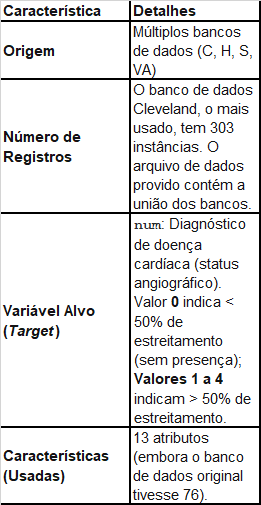



In [ ]:
# ============================
# Carregar dados
# ============================

import pandas as pd # Import pandas here

# Selecionar caminho para a pasta no drive
caminho_pasta = "/content/drive/MyDrive/FGV_MBA_em_Inteligência_Artificial_e_Analytics_Aplicadas_a_Negócios/TÉCNICAS_SUPERVISIONADAS_DE_MACHINE_LEARNING/Trabalho_em_grupo"

# Ler o arquivo `heart_disease_dataset.csv` em um DataFrame do pandas
data = pd.read_csv(f"{caminho_pasta}/heart_disease_dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Visualizar a dimensão do DataFrame e as primeiras linhas
print(data.shape)
data.head()


(920, 15)


,FonteDB,idade,sexo,cp,trestbps,col,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,C,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,C,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,C,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,C,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,C,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Quais são os atributos (*features*)?

In [ ]:
X = data.drop(columns=['num'])
print(X.head())
#print(X.shape)

  FonteDB  idade  sexo   cp  trestbps    col  fbs  restecg  thalach  exang  \
0       C   63.0   1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1       C   67.0   1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2       C   67.0   1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3       C   37.0   1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4       C   41.0   0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slope   ca  thal  
0      2.3    3.0  0.0   6.0  
1      1.5    2.0  3.0   3.0  
2      2.6    2.0  2.0   7.0  
3      3.5    3.0  0.0   3.0  
4      1.4    1.0  0.0   3.0  


Qual é o atributo alvo?

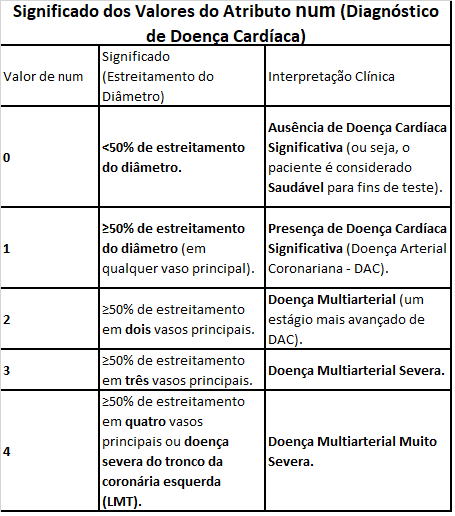

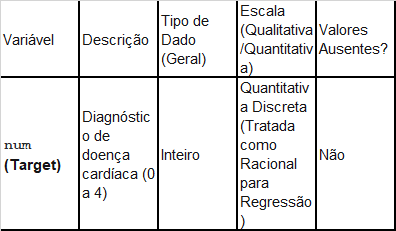

In [ ]:
y = data.num
print(y)

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64


## 3. Caracterização de dados

### Tipos de dados (dtypes no Pandas)

Nesta etapa, observamos como o **pandas** reconhece os dados do DataFrame por meio dos *dtypes* (tipos de dados).  
- **object**: normalmente usado para representar variáveis categóricas (texto).  
- **int64**: números inteiros, em geral associados a contagens ou variáveis discretas.  
- **float64**: números decimais, usados para variáveis contínuas.  

Essa visão é importante para garantir que cada coluna esteja corretamente tipada antes de avançarmos para análises estatísticas mais detalhadas, onde classificaremos os atributos como qualitativos (nominais, ordinais) ou quantitativos (discretos, contínuos).


In [ ]:
X.dtypes

,0
FonteDB,object
idade,float64
sexo,float64
cp,float64
trestbps,float64
col,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64


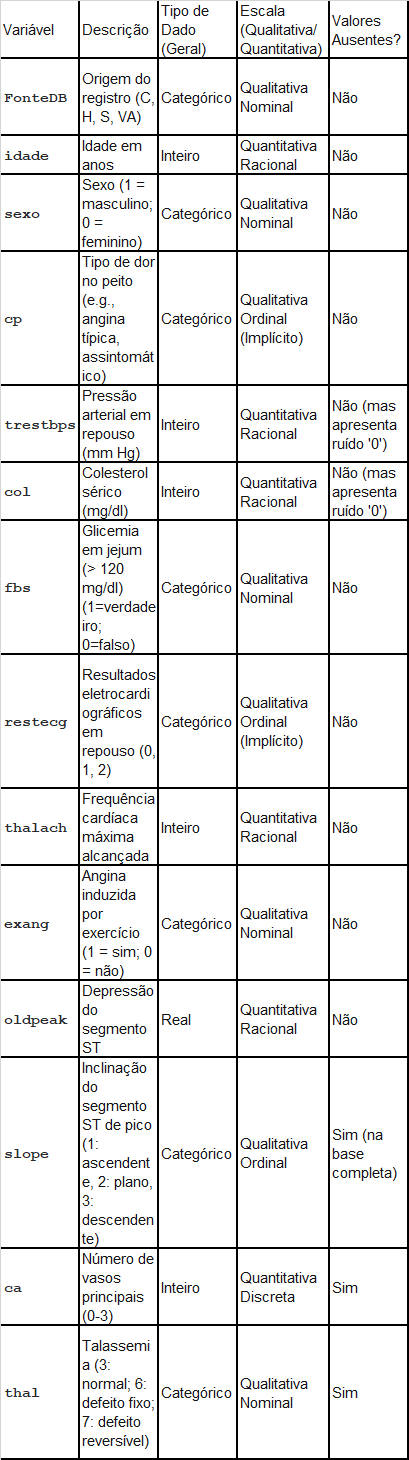

No `pandas`, por padrão, valores:

- qualitativos (nominais e ordinais) são armazenados como `object`;
- quantitativos discretos, como `int64`;
- quantitativos contínuos, como `float64`.

Informações, como:

- unidades associadas (quantitativos),
- ordem (qualitativos ordinais),

devem ser tratadas pelo conhecimento de domínio.

### Tipos de atributos

### Qualitativos nominais

*Será?* O que o especialista diria?

In [ ]:
print('make', pd.unique(X.make))

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


In [ ]:
print('fueltype', pd.unique(X.fueltype))

fueltype ['gas' 'diesel']


In [ ]:
print('aspiration', pd.unique(X.aspiration))

aspiration ['std' 'turbo']


In [ ]:
print('bodystyle', pd.unique(X.bodystyle))

bodystyle ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [ ]:
print('drivewheels', pd.unique(X.drivewheels))

drivewheels ['rwd' 'fwd' '4wd']


In [ ]:
print('enginelocation', pd.unique(X.enginelocation))

enginelocation ['front' 'rear']


In [ ]:
print('enginetype', pd.unique(X.enginetype))

enginetype ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [ ]:
print('fuelsystem', pd.unique(X.fuelsystem))

fuelsystem ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


### Qualitativos ordinais

In [ ]:
print('numofdoors', pd.unique(X.numofdoors))

numofdoors ['two' 'four' nan]


In [ ]:
print('numofcylinders', pd.unique(X.numofcylinders))

numofcylinders ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


### Quantitativos discretos

Podemos converter `numofcylinders` e `numofdoors`.

### Quantitativos contínuos

In [ ]:
print('wheelbase', X.wheelbase.min(), X.wheelbase.max())

wheelbase 86.6 120.9


In [ ]:
print('length', X.length.min(), X.length.max())

length 141.1 208.1


In [ ]:
print('width', X.width.min(), X.width.max())

width 60.3 72.3


In [ ]:
print('height', X.height.min(), X.height.max())

height 47.8 59.8


In [ ]:
print('curbweight', X.curbweight.min(), X.curbweight.max())

curbweight 1488 4066


In [ ]:
print('enginesize', X.enginesize.min(), X.enginesize.max())

enginesize 61 326


In [ ]:
print('bore', X.bore.min(), X.bore.max())

bore 2.54 3.94


In [ ]:
print('stroke', X.stroke.min(), X.stroke.max())

stroke 2.07 4.17


In [ ]:
print('compressionratio', X.compressionratio.min(), X.compressionratio.max())

compressionratio 7.0 23.0


In [ ]:
print('horsepower', X.horsepower.min(), X.horsepower.max())

horsepower 48.0 288.0


In [ ]:
print('peakrpm', X.peakrpm.min(), X.peakrpm.max())

peakrpm 4150.0 6600.0


In [ ]:
print('citympg', X.citympg.min(), X.citympg.max())

citympg 13 49


In [ ]:
print('highwaympg', X.highwaympg.min(), X.highwaympg.max())

highwaympg 16 54


In [ ]:
print('price', X.price.min(), X.price.max())

price 5118.0 45400.0


### Escala

Precisaríamos de um especialista para decidir se são intervalares ou racionais.

Qual seria sua opinião?

## 4. Exploração de dados

### Estatística Descritiva  

- **Definição:** conjunto de técnicas que resumem e descrevem, de forma quantitativa e visual, as principais características de um conjunto de dados.  
- Permite identificar padrões, tendências, anomalias e direcionar etapas posteriores da análise.  

**Principais dimensões avaliadas:**  
- **Frequência:** contagem e proporção de categorias ou ocorrências (ex.: % de clientes em cada região).  
- **Tendência central:** medidas como **média, mediana e moda**, que sintetizam valores típicos.  
- **Dispersão:** grau de variação dos dados em torno da média, medido por **variância, desvio-padrão, amplitude, IQR**.  
- **Forma da distribuição:** assimetria (skewness) e curtose, que indicam se os dados são enviesados ou têm caudas pesadas.  
- **Valores atípicos:** pontos que se afastam do padrão geral e podem indicar erros ou insights relevantes.  

**Importância na prática:**  
- Serve como **primeiro diagnóstico** sobre a qualidade e estrutura dos dados.  
- Fundamenta a escolha de técnicas de **pré-processamento** (tratamento de outliers, normalização, imputação de faltantes).  
- Guia a aplicação de **modelos estatísticos e de aprendizado de máquina**, ao revelar suposições que precisam ser atendidas.

### Análise Univariada

### Frequencia

- **Definição:** proporção de vezes que um atributo assume um dado valor.  
- **Aplicação:** utilizada em valores numéricos e simbólicos.  

**Exemplo – variável `fueltype`:**  
- **gas:** 90,2%  
- **diesel:** 9,8%

In [ ]:
print(X.fueltype.value_counts())

fueltype
gas       185
diesel     20
Name: count, dtype: int64


Fazer para os outros atributos...

### Localidade ou Tendência Central

- **Definição:** medidas que definem pontos de referência nos dados, representando um valor “típico” que resume o conjunto.  

**Valores numéricos:**  
- Média: medida de tendência central mais usada. Calculada como a soma de todos os valores dividida pelo número de observações.
- Mediana: valor que ocupa a posição central quando os dados estão ordenados.
  - A média é bastante sensível a um outlier único, enquanto a mediana é robusta a valores extremos, desde que eles não constituam a maioria dos dados.
- Percentil: pontos que dividem os dados em partes iguais (ex.: o percentil 90 indica o valor abaixo do qual estão 90% das observações).
- Etc.  

**Valores simbólicos:**  
- Moda: valor que ocorre com maior frequência.

In [ ]:
print(X.price.mean())

13207.129353233831


In [ ]:
print(X.price.median())

10295.0


In [ ]:
print(X.price.quantile(q = 0.75))

16500.0


In [ ]:
print(X.make.mode())

0    toyota
Name: make, dtype: object


### Boxplots

- Também chamados de **diagramas de Box e Whisker**.  
- Forma gráfica de visualizar **quartis**.  
- Utilizam quartis e valores máximo e mínimo.  

**Elementos principais:**  
- **Q1:** Primeiro quartil.  
- **Q2:** Mediana (segundo quartil).  
- **Q3:** Terceiro quartil.  
- **Extremos:** valores mínimo e máximo (dentro do limite aceitável).  

---

### Boxplot Modificado

- O limite superior/inferior vai até o maior/menor valor apenas se esse valor não for muito distante do 3º/1º quartil.  
- O critério utilizado é **1,5 × IQR (intervalo interquartílico)**, onde:  

$$
IQR = Q3 - Q1
$$  

- Valores acima ou abaixo desse limite são considerados **outliers**.


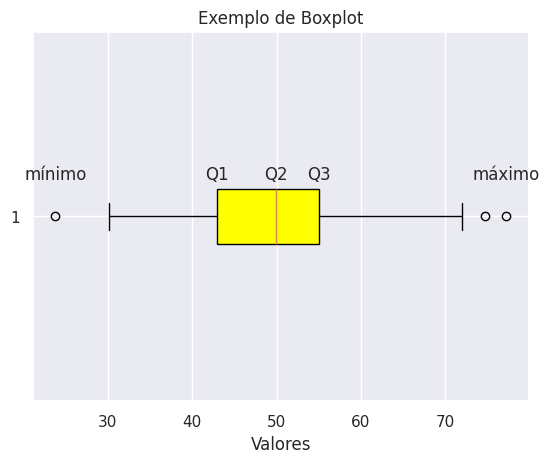

In [ ]:
# Criar dados simulados
np.random.seed(42)
dados = np.random.normal(loc=50, scale=10, size=200)

# Calcular estatísticas
q1 = np.percentile(dados, 25)
q2 = np.median(dados)
q3 = np.percentile(dados, 75)
minimo = np.min(dados)
maximo = np.max(dados)

# Criar boxplot
plt.boxplot(dados, vert=False, patch_artist=True, boxprops=dict(facecolor="yellow"))
plt.title("Exemplo de Boxplot")
plt.xlabel("Valores")

# Adicionar rótulos
plt.text(minimo, 1.1, "mínimo", ha="center")
plt.text(q1, 1.1, "Q1", ha="center")
plt.text(q2, 1.1, "Q2", ha="center")
plt.text(q3, 1.1, "Q3", ha="center")
plt.text(maximo, 1.1, "máximo", ha="center")

plt.show()

### Quartis e Percentis

- **Mediana:** divide os dados ordenados ao meio.  
- **Quartis e percentis:** utilizam pontos de divisão diferentes.  

**Quartis:**  
- **1º quartil (Q1):** valor que tem 25% dos demais valores abaixo dele.  
- **2º quartil (Q2):** mediana (50% dos valores abaixo).  
- **3º quartil (Q3):** valor que tem 75% dos demais valores abaixo.  

**Percentis:**  
- Definidos para *p* entre 0 e 100.  
- O *p*-ésimo percentil (Pp) é o valor `xi` tal que *p%* dos valores observados são menores que `xi`.  

**Relações importantes:**  
- P25 = Q1  
- P50 = Q2 = mediana  
- P75 = Q3

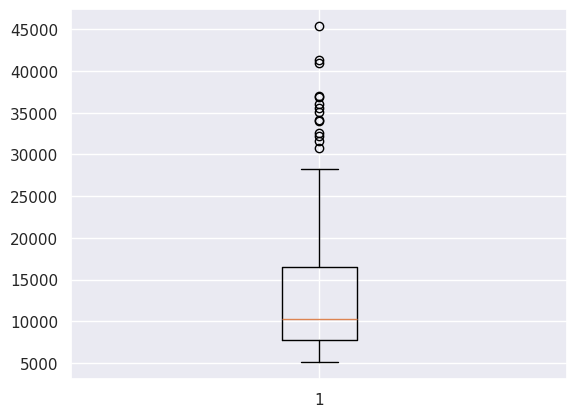

In [ ]:
plt.boxplot(X.price[~np.isnan(X.price)]) # Removemos os atributos ausentes
plt.show()

### Medidas de Espalhamento  

- **Definição:** indicam o grau de **dispersão** ou **variabilidade** de um conjunto de valores.  
- **Utilidade:** ajudam a entender se os dados estão:  
  - Muito **espalhados** (alta variabilidade).  
  - Mais **concentrados** em torno de um valor central (ex.: a média).  

**Medidas mais comuns:**  
- **Intervalo (ou amplitude):** diferença entre o maior e o menor valor.  
- **Variância:** média dos desvios quadráticos em relação à média.  
- **Desvio padrão:** raiz quadrada da variância; expressa a dispersão na mesma unidade dos dados.

In [ ]:
print(X.price.max() - X.price.min())

40282.0


In [ ]:
print(X.price.var())

63155863.443184026


In [ ]:
print(X.price.std())

7947.066341939271


### Medidas de Distribuição

**Definição:** Obliquidade (Skewness) e Curtose (Kurtosis) descrevem a forma da distribuição dos dados em torno da média.

---

### Obliquidade (Skewness)
- Mede a **simetria da distribuição** em torno da média.  
- Distribuições podem ser:
  - **Simétrica** → skew ≈ 0 (ex.: distribuição normal)  
  - **Assimétrica à esquerda (negativa)** → cauda mais longa à esquerda  
  - **Assimétrica à direita (positiva)** → cauda mais longa à direita  
- Valores de referência:
  - `|skew| < 0.5` → aproximadamente simétrica  
  - `0.5 ≤ |skew| < 1` → moderadamente assimétrica  
  - `|skew| ≥ 1` → fortemente assimétrica  

---

### Curtose (Kurtosis)
- Mede o **grau de concentração nas caudas** em relação à distribuição normal.  
- Tipos comuns:
  - **Mesocúrtica** → curtose ≈ 0 (ex.: normal)  
  - **Leptocúrtica** → curtose > 0 (caudas pesadas, mais outliers)  
  - **Platicúrtica** → curtose < 0 (caudas leves, menos outliers)

In [ ]:
print(X.price.skew())

1.8096753390980749


In [ ]:
print(X.price.kurtosis())

3.2315368868295193


### Histograma

- **Definição:** forma gráfica para visualizar a distribuição de dados.  
- **Funcionamento:** divide os valores em *cestas* (bins).  

**Regras de formação das cestas:**  
- **Valores categóricos:** cada valor único corresponde a uma cesta.  
- **Valores numéricos:** divisão em intervalos contíguos de mesmo tamanho, cada intervalo é uma cesta.  

**Representação:**  
- Para cada cesta, desenha-se uma barra cuja altura é proporcional ao número de elementos naquela faixa.

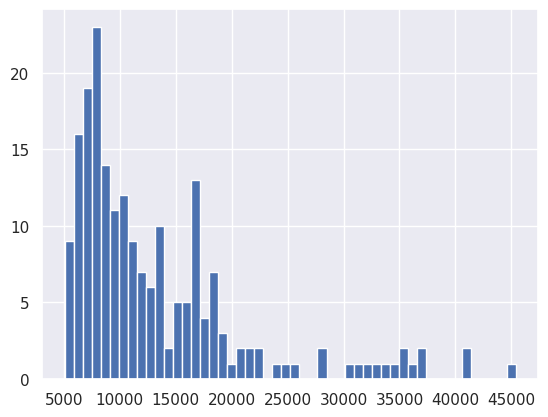

In [ ]:
# Distribuição de uma variável quantitativa contínua
plt.hist(X.price[~np.isnan(X.price)], 50)
plt.show()

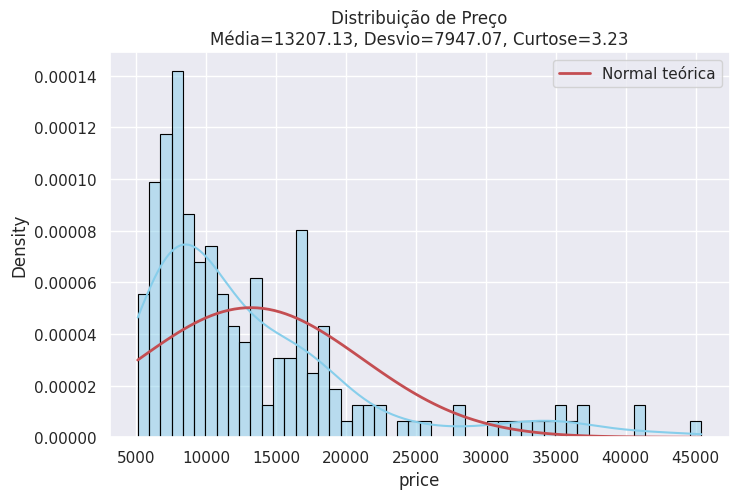

In [ ]:
# tira valores NaN
dados = X.price[~np.isnan(X.price)]

plt.figure(figsize=(8,5))
# histograma com densidade
sns.histplot(dados, bins=50, kde=True, stat="density", color="skyblue", edgecolor="black")

# curva normal ajustada
mu, sigma = dados.mean(), dados.std()
x = np.linspace(dados.min(), dados.max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r', lw=2, label="Normal teórica")

plt.title(f"Distribuição de Preço\nMédia={mu:.2f}, Desvio={sigma:.2f}, Curtose={dados.kurtosis():.2f}")
plt.legend()
plt.show()

### Interpretação da Distribuição de Preço

1. Comparação: dados reais × normal teórica
- **Barras azuis** → histograma dos preços  
- **Linha azul clara** → curva de densidade (KDE) com base nos dados  
- **Linha vermelha** → curva normal teórica (mesma média e desvio-padrão)  

Os dados **não seguem bem a normal**:
- Maior concentração entre **7k–15k**  
- **Cauda longa à direita** (valores altos mais frequentes do que na normal)

---

2. Estatísticas principais
- **Média** ≈ 13.207  
- **Desvio-padrão** ≈ 7.947  
- **Curtose (excesso)** = 3.23 → indica **caudas pesadas** e presença de outliers

---

3. Implicações práticas
- Distribuição **assimétrica à direita**  
- **Não é normal**: concentração em valores médios-baixos + muitos extremos  
- Para análises/modelos que assumem normalidade:  
  - Testar transformações (log, Box-Cox, Yeo-Johnson)  
  - Usar métodos robustos a outliers  

---

> **Conclusão**: `price` apresenta distribuição **não-normal**, com forte cauda à direita e curtose elevada.

In [ ]:
import numpy as np
from scipy.stats import shapiro

# tira valores NaN
dados = X.price[~np.isnan(X.price)]

# aplica o teste Shapiro-Wilk
stat, p = shapiro(dados)

print(f"Stat={stat:.4f}, p={p:.4f}")
if p > 0.05:
    print("Não rejeita normalidade")
else:
    print("Rejeita normalidade")


Stat=0.7985, p=0.0000
Rejeita normalidade


### Teste de Normalidade (Shapiro-Wilk)

**Definição:**  
O teste **Shapiro-Wilk** avalia a hipótese nula de que os dados vêm de uma **distribuição normal**.  

- **Estatística (W):** varia entre 0 e 1 → quanto mais próximo de 1, mais os dados se parecem com a normal.  
- **p-valor:** indica se rejeitamos ou não a hipótese de normalidade.  

**Critério de decisão:**  
- p > 0.05 → **não rejeita normalidade** (dados compatíveis com normal)  
- p ≤ 0.05 → **rejeita normalidade** (dados não seguem normalidade)  

---

**Resultado obtido**
- **Stat = 0.7985**  
- **p = 0.0000**  
- Decisão: **Rejeita normalidade**


> Isso confirma que a variável `price` **não segue distribuição normal**, o que é coerente com a assimetria positiva (skewness = 1.81) e a curtose alta (3.23) observadas anteriormente.


### Distribuição da Variável Categórica (fueltype)

Além de analisar a variável numérica `price`, também é útil visualizar a distribuição de variáveis **categóricas**.  
O histograma (ou countplot) mostra a frequência de cada categoria presente na variável `fueltype`.


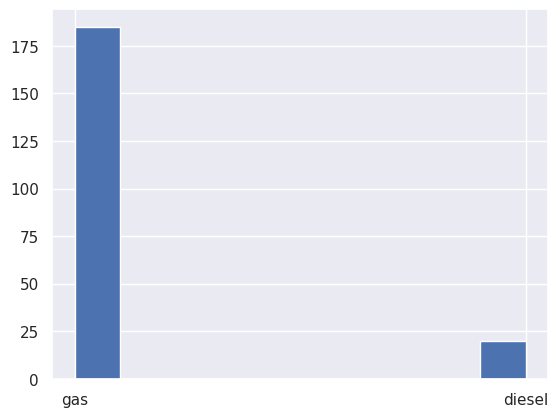

In [ ]:
plt.hist(X.fueltype)
plt.show()

### Gráfico de Pizza

- **Definição:** outra forma gráfica de visualizar a distribuição de um conjunto de valores.  
- **Indicação:** mais adequado para **valores qualitativos**.  
- **Para valores quantitativos:** é necessário agrupar em cestas (intervalos).  
- **Representação:** cada valor ocupa uma fatia cuja área é proporcional ao número de vezes que aparece no conjunto de dados.  

**Exemplo:**  
Um bom uso seria a variável **`fueltype`**, que possui duas categorias:  
- **gas:** 90,2%  
- **diesel:** 9,8%

Nesse caso, o gráfico de pizza mostra de forma clara a proporção de carros a gasolina versus a diesel.

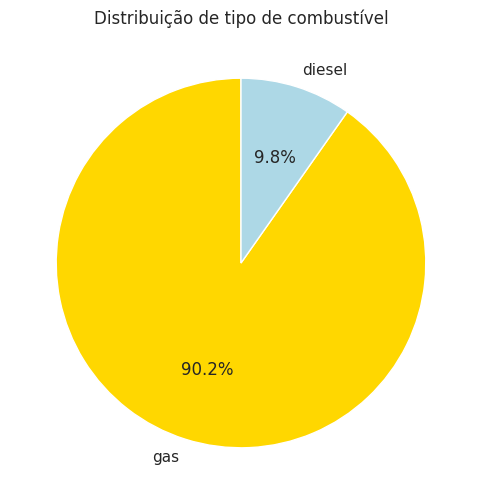

In [ ]:
# Contagem dos tipos de combustível
fuel_counts = X["fueltype"].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%',
        startangle=90, colors=["gold", "lightblue"])
plt.title("Distribuição de tipo de combustível")
plt.show()

### `Pandas.DataFrame.describe()`

O método `describe()` do **pandas** gera um resumo estatístico automático das colunas numéricas (e, opcionalmente, categóricas) de um DataFrame.  

Esse resumo é útil na **Análise Exploratória de Dados (EDA)** porque permite ter uma visão rápida das principais estatísticas descritivas, como:  

- **count** → número de valores não nulos  
- **mean** → média  
- **std** → desvio padrão  
- **min, max** → valores mínimo e máximo  
- **25%, 50%, 75%** → quartis (medidas de posição que ajudam a entender a dispersão dos dados)  

Para variáveis **categóricas**, podemos usar:  

- `df.describe(include=["object"])` → gera estatísticas apenas para variáveis qualitativas.  
- `df.describe(include="all")` → gera estatísticas para todos os tipos de variáveis.  

Assim, é possível ter uma visão geral tanto de variáveis numéricas quanto de variáveis qualitativas de forma rápida e prática.


In [ ]:
# Resumo estatístico numérico
X.describe()

,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# Incluir colunas categóricas também
X.describe(include="all")

,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,...,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,22,2,2,2,5,3,2,NaN,NaN,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,32,185,168,114,96,120,202,NaN,NaN,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [ ]:
# Resumo estatístico + skewness + kurtosis
stats = X["price"].agg(["mean", "median", "std", "min", "max"])
stats["skew"] = X["price"].skew()
stats["kurtosis"] = X["price"].kurtosis()  # excesso de curtose (normal = 0)

# Exibir em formato tabular
stats = stats.to_frame(name="price")
stats


,price
mean,13207.129353
median,10295.000000
std,7947.066342
min,5118.000000
max,45400.000000
skew,1.809675
kurtosis,3.231537


In [ ]:
# Variável qualitativa
stats_cat = X["fueltype"].describe()[["count", "unique", "top", "freq"]]

# Exibir em formato tabular
stats_cat = stats_cat.to_frame(name="fueltype")
stats_cat


,fueltype
count,205
unique,2
top,gas
freq,185


In [ ]:
# Distribuição de frequências relativas (%)
freq_table = X["fueltype"].value_counts(normalize=True).to_frame(name="proporção")
freq_table


,proporção
fueltype,
gas,0.902439
diesel,0.097561


### Dados Multivariados

- **Definição:** possuem mais de um atributo de entrada.  


**Medidas estatísticas:**  
- Medidas de localidade e espalhamento podem ser calculadas separadamente para cada atributo.  
  - Exemplo: média  
  - Média em dados multivariados:  
    $$
    \bar{x} = (\bar{x}_1, \ldots, \bar{x}_d)
    $$  

**Análises possíveis:**  
- Permitem estudar a relação entre dois ou mais atributos.  
- Para variáveis contínuas, o espalhamento é melhor capturado por uma **matriz de covariância**.  
- Cada elemento da matriz representa a covariância entre dois atributos.  

**Covariância:**  
$$
\text{cov}(x_i, x_j) = \frac{1}{n - 1} \sum_{k=1}^{n} (x_{ik} - \bar{x}_i)(x_{jk} - \bar{x}_j)
$$  

**Observação:**  
$$
\text{cov}(x_i, x_i) = \text{var}(x_i)
$$  


### Covariância

- **Definição:** a covariância entre dois atributos mede o grau com que eles variam juntos.  
- **Interpretação dos valores entre dois vetores** $x_i$ e $x_j$:  
  - **Próximo de 0:** atributos não têm um relacionamento linear.  
  - **> 0 (positiva):** atributos são diretamente relacionados.  
  - **< 0 (negativa):** atributos são inversamente relacionados.  

**Atenção:**  
- O valor depende da **magnitude dos atributos**.  
- Não é possível avaliar o relacionamento entre atributos apenas pela covariância.

In [ ]:
Xnumeric = X.select_dtypes(include=['int64', 'float64'])

In [ ]:
np.cov(Xnumeric)

array([[13845502.85562472, 16606347.43117418, 16619120.89517198, ...,
        21342342.55033682, 22080400.14156209, 22372244.45352693],
       [16606347.43117418, 20012193.79243791, 20019183.45698517, ...,
        25800432.59017198, 26758579.02315549, 27076642.45545001],
       [16619120.89517198, 20019183.45698517, 20031500.40859176, ...,
        25805738.60040495, 26767194.4186522 , 27080879.63728077],
       ...,
       [21342342.55033682, 25800432.59017198, 25805738.60040495, ...,
        33334487.65024012, 34635270.03463022, 35010938.31812692],
       [22080400.14156209, 26758579.02315549, 26767194.4186522 , ...,
        34635270.03463022, 36050588.99163351, 36401749.70302693],
       [22372244.45352693, 27076642.45545001, 27080879.63728077, ...,
        35010938.31812692, 36401749.70302693, 36782461.92758077]])

### Correlação

A **correlação** indica a força da relação linear entre dois atributos.

- **Matriz de correlação**: mostra a correlação entre todos os pares de atributos.

### Fórmula da Correlação de Pearson

$$
\rho(x_i, x_j) = \frac{\mathrm{cov}(x_i, x_j)}{\sigma_{x_i}\,\sigma_{x_j}}
$$

onde:  
- $\mathrm{cov}(x_i, x_j)$ = covariância entre $x_i$ e $x_j$  
- $\sigma_x$ = desvio-padrão da variável $x$  

---

**Observações:**  
- Valores em $[-1,\,1]$:  
  - $-1$ → correlação linear negativa máxima  
  - $+1$ → correlação linear positiva máxima  
  - $0$ → ausência de correlação linear  
- Autocorrelação: $\rho(x_i, x_i) = 1$  
- Valores próximos de $-1$ ou $+1$ indicam **forte correlação linear**.  
- Importante: a correlação de Pearson mede apenas **relações lineares**.  
  Uma correlação próxima de 0 não implica ausência total de relação — pode haver relação **não linear**.

---

> **Atenção**  
É tentador supor que uma alta correlação implique algum tipo de conexão causal, mas isso está errado.  
Correlação indica apenas **associação linear** entre variáveis, não necessariamente uma relação de causa e efeito.

---

### Exemplo de Correlação Espúria

Um exemplo clássico de correlação espúria é a relação entre:

- **Consumo de sorvete**   
- **Número de afogamentos**

Sorvete e afogamentos → correlação positiva.

Durante o verão, ambos aumentam, mas **não porque um causa o outro**.  
Na verdade, a variável escondida (**temperatura**) influencia os dois fenômenos.

---

> Essa situação ilustra que **correlação não significa causalidade**.  
É sempre necessário investigar fatores externos, considerar o contexto e verificar a influência de outras variáveis no problema.


In [ ]:
np.corrcoef(Xnumeric)

array([[1.        , 0.99763667, 0.99792279, ..., 0.99343813, 0.98831728,
        0.99136776],
       [0.99763667, 1.        , 0.99986708, ..., 0.99892469, 0.99622977,
        0.99799201],
       [0.99792279, 0.99986708, 1.        , ..., 0.99864852, 0.99607016,
        0.99766705],
       ...,
       [0.99343813, 0.99892469, 0.99864852, ..., 1.        , 0.99911506,
        0.99985371],
       [0.98831728, 0.99622977, 0.99607016, ..., 0.99911506, 1.        ,
        0.99964473],
       [0.99136776, 0.99799201, 0.99766705, ..., 0.99985371, 0.99964473,
        1.        ]])

### Relação entre preço e potência

Um bom método padrão para descrever a relação entre duas variáveis é:

1. **Visualização** com diagrama de dispersão bivariado (scatter plot)
2. Medida de associação (coeficiente de correlação)
3. Estatísticas de resumo (média, SD, n, etc.)


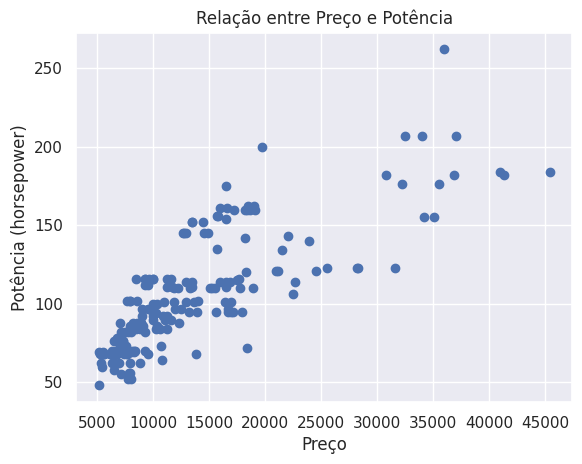

In [ ]:
plt.scatter(X.price, X.horsepower)
plt.xlabel("Preço")
plt.ylabel("Potência (horsepower)")
plt.title("Relação entre Preço e Potência")
plt.show()

### Interpretação do Scatter: Preço × Potência

- **Tendência positiva**  
  - Carros com maior **potência (horsepower)** tendem a ter maior **preço**.  
  - Isso sugere uma **correlação positiva** entre as variáveis.  

- **Dispersão**  
  - Há carros com **preços semelhantes**, mas potências diferentes, e vice-versa.  

- **Possíveis outliers**  
  - Alguns modelos muito caros e potentes destoam do padrão, possivelmente carros esportivos ou de luxo.  

- **Conclusão**  
  - O scatter ajuda a **visualizar a relação geral**, mas não explica o preço sozinho:  
    outros fatores também influenciam o valor de um automóvel.

In [ ]:
X[["price", "horsepower"]].corr()


,price,horsepower
price,1.000000,0.810533
horsepower,0.810533,1.000000


 O coeficiente de correlação **0.81** indica uma **forte correlação positiva**:  
carros mais potentes tendem a ser mais caros.  

> No entanto, correlação não significa causalidade:  
o preço de um carro é determinado por múltiplos fatores além da potência (marca, design, tecnologia, etc.).

In [ ]:
X[["price", "horsepower"]].describe()


,price,horsepower
count,201.000000,203.000000
mean,13207.129353,104.256158
std,7947.066342,39.714369
min,5118.000000,48.000000
25%,7775.000000,70.000000
50%,10295.000000,95.000000
75%,16500.000000,116.000000
max,45400.000000,288.000000


### Estatísticas de resumo: Preço × Potência

|       | price       | horsepower |
|-------|-------------|------------|
| count | 201         | 203        |
| mean  | 13.207      | 104.26     |
| std   | 7.947       | 39.71      |
| min   | 5.118       | 48         |
| 25%   | 7.775       | 70         |
| 50%   | 10.295      | 95         |
| 75%   | 16.500      | 116        |
| max   | 45.400      | 288        |

- O preço médio dos carros é de **≈13 mil dólares**, variando entre **5 mil** e **45 mil**.  
- A potência média é de **≈104 HP**, indo de **48 HP** a **288 HP**.  
- Os quartis mostram que a maior parte dos carros tem **potência abaixo de 120 HP** e **preço abaixo de 16.500**.  

> Esses valores ajudam a contextualizar o gráfico de dispersão e a correlação:  
carros mais potentes tendem a estar na faixa de preço mais alta.

### Distribuição de Preços por Tipo de Combustível KDE plot (Kernel Density Estimation)

- O gráfico mostra a **densidade de probabilidade** dos preços.  
- A **área sob cada curva é 1 (100%)**, permitindo comparar formatos mesmo com tamanhos de amostras diferentes.  
- **Gasolina (azul):** distribuição concentrada entre 5.000 e 20.000, com alguns picos em faixas mais altas (~30k–40k).  
- **Diesel (laranja):** preços mais concentrados em torno de 10.000–15.000, sem grande dispersão.  

> Esse tipo de gráfico é ideal para comparar **a forma da distribuição** entre grupos diferentes.

<Axes: xlabel='price', ylabel='Density'>

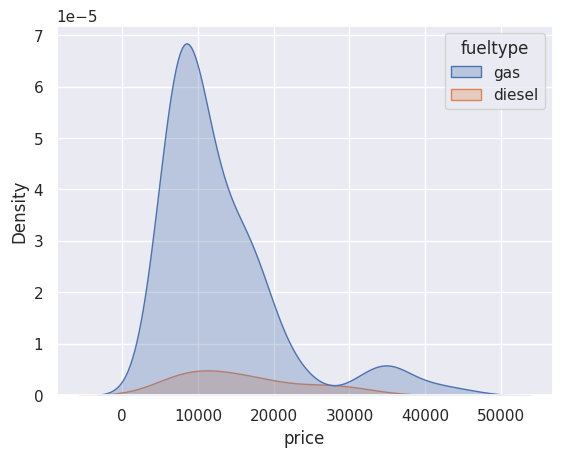

In [ ]:
sns.kdeplot(data=X, x="price", hue="fueltype", fill=True, alpha=0.3)


### Distribuição de Preços por Tipo de Combustível (Histograma)

- O gráfico mostra a **contagem absoluta** de carros em cada faixa de preço.  
- **Gasolina (azul):** muito mais observações que diesel, concentradas entre 5.000 e 20.000.  
- **Diesel (laranja):** menor quantidade de carros, também concentrados na faixa de 10.000–15.000.  
- A sobreposição das barras permite visualizar as diferenças de volume entre os grupos.  

> Esse tipo de gráfico é ideal para analisar **quantidades reais** de observações em cada categoria.


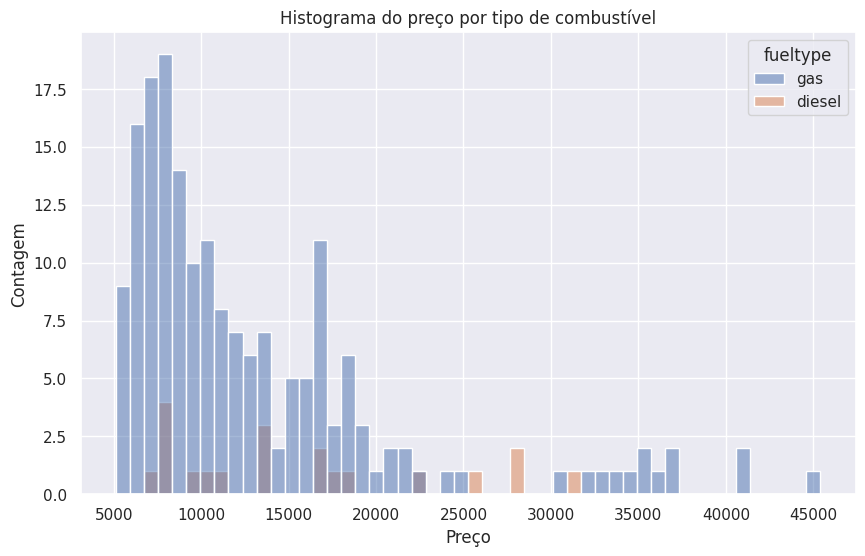

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x="price", hue="fueltype", bins=50, alpha=0.5)
plt.title("Histograma do preço por tipo de combustível")
plt.xlabel("Preço")
plt.ylabel("Contagem")
plt.show()

### Histogramas de Preço por Tipo de Combustível (FacetGrid)

- O gráfico mostra **um histograma separado para cada categoria de combustível**.  
- **Gasolina (acima):** grande volume de observações, concentrado entre 5.000 e 20.000, com longa cauda à direita.  
- **Diesel (abaixo):** bem menos observações, concentradas em torno de 10.000–20.000, sem grande dispersão.  
- A separação dos gráficos facilita a leitura, evitando sobreposição de cores.  

> Esse tipo de visualização é útil para analisar **cada grupo individualmente**, sem perder a escala comparável do eixo X (preço).

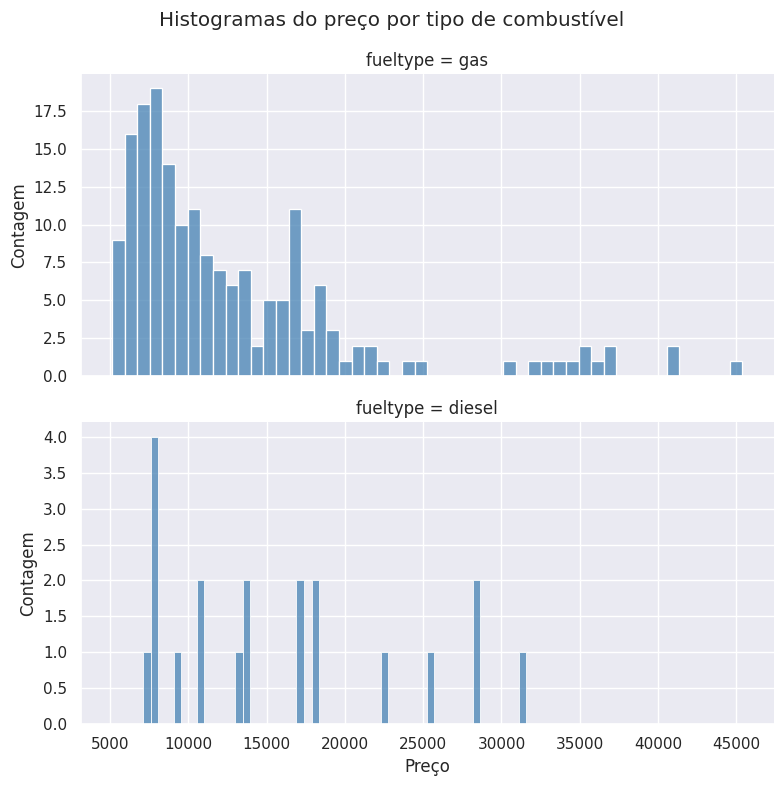

In [ ]:
g = sns.FacetGrid(data, row="fueltype", height=4, aspect=2, sharey=False)
g.map(sns.histplot, "price", bins=50, color="steelblue")
g.set_axis_labels("Preço", "Contagem")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Histogramas do preço por tipo de combustível")
plt.show()

### Boxplot do Preço por Tipo de Combustível

- O boxplot permite comparar a **distribuição dos preços** entre gasolina e diesel.  
- **Gasolina (azul):**  
  - Mediana em torno de 10.000.  
  - Maior concentração de preços entre 7.500 e 15.000.  
  - Muitos outliers acima de 25.000, chegando até 45.000.  
- **Diesel (laranja):**  
  - Mediana mais alta (~14.000).  
  - Distribuição mais ampla, com preços entre 7.000 e 32.000.  
  - Poucos outliers.  

> Esse gráfico é ideal para **comparar medianas, dispersão e outliers** entre categorias.

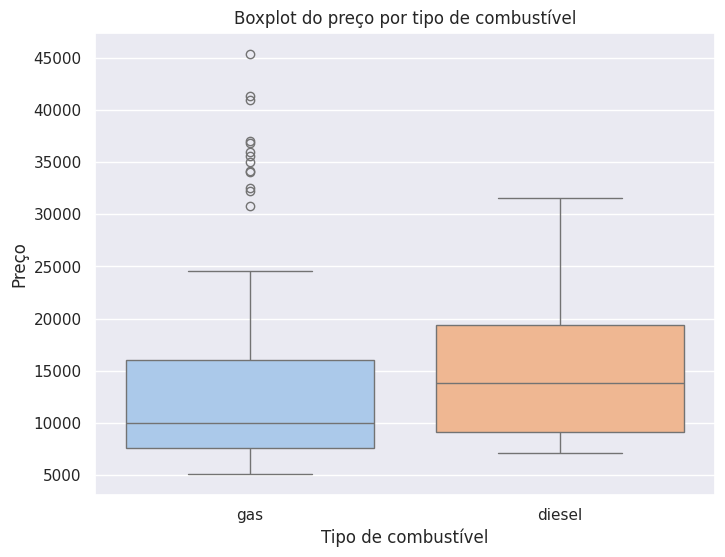

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x="fueltype", y="price", hue="fueltype", palette="pastel", legend=False)
plt.title("Boxplot do preço por tipo de combustível")
plt.xlabel("Tipo de combustível")
plt.ylabel("Preço")
plt.show()

### Relatórios exploratórios automáticos

Vamos gerar relatórios de análise exploratória de dados utilizando `ydata-profiling` e `sweetviz`, desconsiderando a coluna `normalizedlosses`.

In [ ]:
# ============================================================
# Gerar e salvar Relatório Automático de EDA (ydata_profiling)
# e baixar para o computador
# ===========================================================

# Gerar o relatório
profile = ProfileReport(
    data.drop(columns=["normalizedlosses"], errors="ignore"),
    title="Relatório de Análise Exploratória",
    explorative=True
)

# Salvar o HTML em diretório definido
output_file = "/content/drive/MyDrive/FGV_MBA em Inteligência Artificial e Analytics Aplicadas a Negócios/TÉCNICAS SUPERVISIONADAS DE MACHINE LEARNING/Relatorio_Automatico_EDA.html"
profile.to_file(output_file)

# Fazer o download para o computador
files.download(output_file)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 25/25 [00:00<00:00, 61.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =======================================================================
# Gerar e salvar Relatório Automático de EDA (ydata_profiling e sweetviz)
# e baixar para o computador
# =======================================================================

import numpy as np # Import numpy here

# --- Compatibilidade Sweetviz x NumPy>=2 (monkey-patch) ---
# Executar este bloco ANTES de "import sweetviz"
if not hasattr(np, "VisibleDeprecationWarning"):
    np.VisibleDeprecationWarning = DeprecationWarning

# ============================================
# Configurações básicas
# ============================================
# Caminho do CSV
# -> Atribua o caminho local/Drive.
DATA_PATH = "/content/drive/MyDrive/FGV_MBA em Inteligência Artificial e Analytics Aplicadas a Negócios/TÉCNICAS SUPERVISIONADAS DE MACHINE LEARNING/imports85.csv"   # <-- ajuste aqui se precisar

# Pasta de saída
OUT_DIR = Path("./eda_output")
OUT_DIR.mkdir(exist_ok=True)

# (Opcional) coluna alvo para análises supervisionadas
# Exemplo: TARGET_COL = "symboling"
TARGET_COL = None

# ============================================
# 1) Carregar dados e salvar "com índices"
# ============================================
df = pd.read_csv(DATA_PATH)

# Cria uma coluna explícita de índice (row_id = 1..N), preservando a ordem original
df_i = df.reset_index().rename(columns={"index": "row_id"})
df_i["row_id"] = df_i["row_id"] + 1

# Salva o dataset com a coluna de índice (sem adicionar índice do pandas no arquivo)
csv_com_indices = OUT_DIR / "dataset_com_indices.csv"
df_i.to_csv(csv_com_indices, index=False)

print(f"✅ Dataset salvo COM índices (coluna 'row_id'): {csv_com_indices.resolve()}")

# ============================================
# 2) Resumos descritivos (salvos COM índice)
# ============================================
# Estatísticas descritivas por coluna (sem datetime_is_numeric)
desc = df.describe(include="all").transpose()
desc_csv = OUT_DIR / "resumo_descritivo.csv"
desc.to_csv(desc_csv)  # mantém o índice (nomes das colunas) no arquivo
print(f"✅ Resumo descritivo salvo: {desc_csv.resolve()}")

# Valores ausentes por coluna
missing = df.isna().sum().to_frame("missing_count")
missing["missing_pct"] = (missing["missing_count"] / len(df)).round(4)
missing_csv = OUT_DIR / "valores_ausentes.csv"
missing.to_csv(missing_csv)
print(f"✅ Valores ausentes salvos: {missing_csv.resolve()}")

# Cardinalidade das colunas (número de valores únicos)
card = df.nunique(dropna=False).to_frame("n_unique")
card_csv = OUT_DIR / "cardinalidade.csv"
card.to_csv(card_csv)
print(f"✅ Cardinalidade salva: {card_csv.resolve()}")

# ============================================
# 3) Data Profiling Report — ydata-profiling
# ============================================
profile_html = OUT_DIR / "Relatorio_Automatico_Profiling.html"

try:
    from ydata_profiling import ProfileReport

    extra_args = {}
    if (TARGET_COL is not None) and (TARGET_COL in df.columns):
        extra_args["y"] = TARGET_COL

    profile = ProfileReport(
        df,
        title="Relatório de Data Profiling (EDA)",
        explorative=True,
        **extra_args
    )
    profile.to_file(profile_html)
    print(f"✅ Relatório ydata-profiling salvo: {profile_html.resolve()}")

except Exception as e:
    print("⚠️ Não foi possível gerar o relatório com ydata-profiling.")
    print("   Dica: no Colab, descomente a linha de instalação e rode novamente.")
    print(f"   Erro: {e}")

# ============================================
# 4) Data Profiling Report — Sweetviz
# ============================================
sweetviz_html = OUT_DIR / "Relatorio_Automatico_Sweetviz.html"
try:
    import sweetviz as sv
    target_feat = TARGET_COL if (TARGET_COL is not None and TARGET_COL in df.columns) else None
    rep = sv.analyze(df, target_feat=target_feat)
    rep.show_html(str(sweetviz_html), open_browser=False)
    print(f"✅ Relatório Sweetviz salvo: {sweetviz_html.resolve()}")
except Exception as e:
    print("⚠️ Não foi possível gerar o relatório com Sweetviz.")
    print("   Dica 1: garanta a instalação (descomente o pip acima).")
    print("   Dica 2: se persistir, rode `!pip install -q sweetviz==2.3.1` e reexecute.")
    print(f"   Erro: {e}")

# ============================================
# 5) Para visualizar no notebook / Baixar
# ============================================
try:
    from IPython.display import IFrame, display, HTML
    display(HTML(f"<p><strong>Abrir ydata:</strong> {profile_html}</p>"))
    display(HTML(f"<p><strong>Abrir sweetviz:</strong> {sweetviz_html}</p>"))
    # Descomente uma das duas linhas abaixo para visualizar embutido:
    # display(IFrame(str(profile_html), width="100%", height=800))
    # display(IFrame(str(sweetviz_html), width="100%", height=800))
except Exception:
    pass

# Para baixar do (Colab):
files.download(str(profile_html))
files.download(str(sweetviz_html))
# files.download(str(csv_com_indices))
# files.download(str(desc_csv))
# files.download(str(missing_csv))
# files.download(str(card_csv))

✅ Dataset salvo COM índices (coluna 'row_id'): /content/eda_output/dataset_com_indices.csv
✅ Resumo descritivo salvo: /content/eda_output/resumo_descritivo.csv
✅ Valores ausentes salvos: /content/eda_output/valores_ausentes.csv
✅ Cardinalidade salva: /content/eda_output/cardinalidade.csv


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 26/26 [00:00<00:00, 76.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Relatório ydata-profiling salvo: /content/eda_output/Relatorio_Automatico_Profiling.html


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Report eda_output/Relatorio_Automatico_Sweetviz.html was generated.
✅ Relatório Sweetviz salvo: /content/eda_output/Relatorio_Automatico_Sweetviz.html


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Heatmap de correlação das variáveis numéricas padronizadas

Selecionaremos apenas as colunas numéricas, padronizaremos os dados e exibiremos um heatmap das correlações.

> Auxilia a visualização de tendências nos dados.

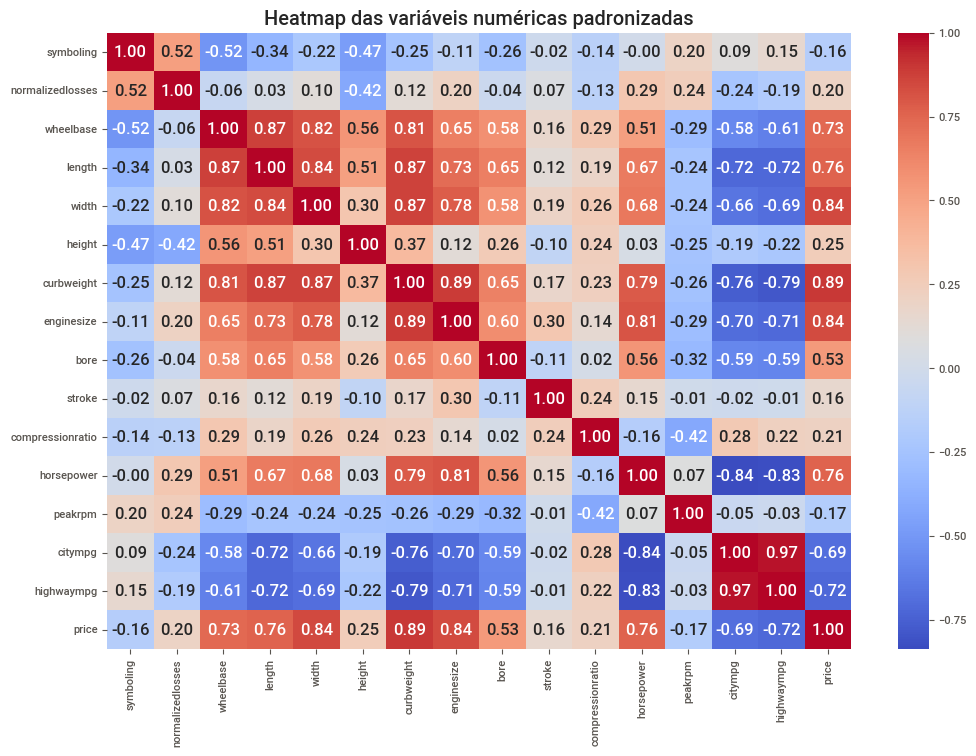

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# Heatmap de correlação das variáveis numéricas padronizadas
numeric_cols = data.select_dtypes(include="number").columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols].dropna())
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

plt.figure(figsize=(12,8))
sns.heatmap(scaled_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap das variáveis numéricas padronizadas")
plt.show()

### Interpretação do Heatmap de Correlação

O gráfico acima mostra a **matriz de correlação** entre as variáveis numéricas da base de dados.

Como interpretar:
- **Diagonal = 1.00**: cada variável correlacionada com ela mesma.
- **Correlação próxima de +1 (vermelho forte)**: relação linear positiva forte.
- **Correlação próxima de -1 (azul forte)**: relação linear negativa forte.
- **Correlação próxima de 0**: pouca ou nenhuma relação linear.

Exemplos observados:
- **Altas correlações positivas (possível multicolinearidade):**
  - `curbweight`, `enginesize`, `horsepower`, `price`, `length`, `width`, `wheelbase`.
  - Todas estão ligadas ao porte do carro e variam juntas.
- **Altas correlações negativas:**
  - `citympg` e `highwaympg` têm correlação negativa com `curbweight`, `enginesize`, `horsepower`.
  - Carros maiores e mais potentes tendem a consumir mais combustível.
- **Correlação fraca:**
  - Variáveis como `stroke` e `compressionratio` mostram baixa correlação com a maioria das outras.

### Heatmap hierárquico das variáveis numéricas padronizadas

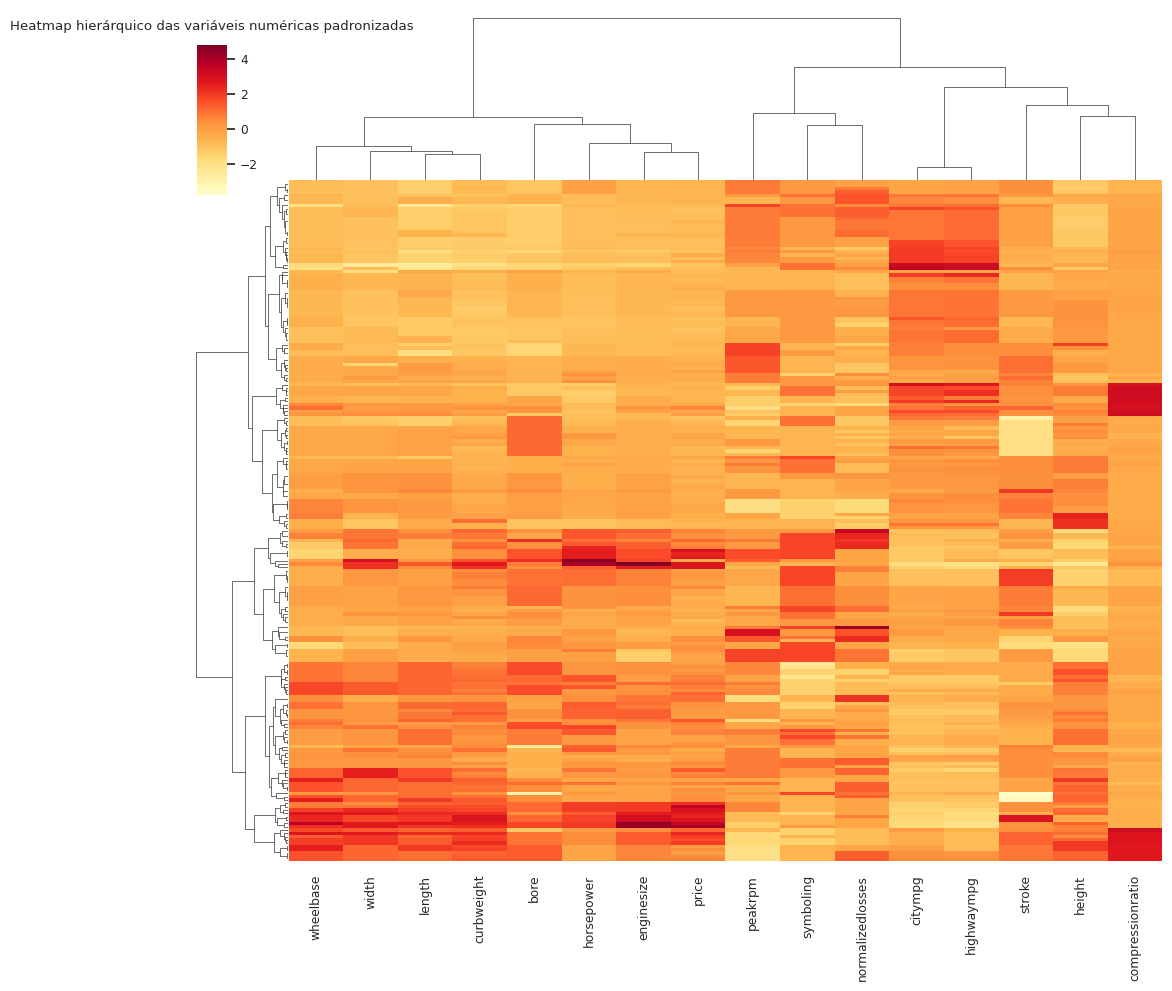

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# 1) Selecionar e preparar os dados numéricos
numeric_cols = data.select_dtypes(include=np.number).columns

# Tratar NaN (clustermap não aceita NaN). Aqui uso mediana, mas pode trocar para média.
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(data[numeric_cols]),
                 columns=numeric_cols, index=data.index)

# Padronizar (média=0, desvio=1)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),
                        columns=numeric_cols, index=data.index)

# 2) Clustered heatmap (dados padronizados)
# Este gráfico  é um dendrograma
# e o calor refere-se aos valores padronizados (não à correlação).
sns.set(font_scale=0.8)  # ajuste do tamanho de fonte

g = sns.clustermap(
    X_scaled,
    method="ward",          # método de ligação hierárquica (existem outros métodos como "complete" ou "average" também)
    metric="euclidean",     # métrica de distância mais utiizada
    cmap="YlOrRd",          # paleta de cores
    figsize=(10, 10),
    row_cluster=True,
    col_cluster=True,
    xticklabels=True,       # Se houver muitas colunas pode colocar False
    yticklabels=False,      # True mostra os índices na lateral direita
    dendrogram_ratio=(.1, .2),    # ajusta o espaço dos dendrogramas
    cbar_pos=(.02, .8, .03, .15)  # posição da barra de cores (opcional)
)

plt.title("Heatmap hierárquico das variáveis numéricas padronizadas", y=1.05)
plt.show()

### Interpretação do Heatmap Hierárquico

O gráfico acima é um **heatmap hierárquico (clustermap)** gerado a partir das variáveis numéricas padronizadas da base de dados.

Como interpretar:

- **Cores (escala à esquerda):**
  - **Amarelo claro** → valores próximos da média (z-score ≈ 0).
  - **Vermelho/laranja escuro** → valores **acima da média** (z-score positivo).
  - **Tons mais claros/esbranquiçados** → valores **abaixo da média** (z-score negativo).

- **Linhas (cada linha = 1 carro):**
  - Representam os veículos.  
  - Carros semelhantes em suas características são agrupados juntos no dendrograma à esquerda.

- **Colunas (variáveis numéricas):**
  - Variáveis que apresentam comportamento semelhante são agrupadas no dendrograma superior.  
  - Exemplo:
    - `curbweight`, `enginesize`, `horsepower` e `price` aparecem juntas → carros mais pesados tendem a ter motores maiores, mais potência e preço mais alto.
    - `citympg` e `highwaympg` se agrupam → consumo urbano e rodoviário estão fortemente relacionados.

Insights principais:

- Existe um **cluster de variáveis de tamanho/peso/potência/preço**.
- Outro cluster reúne **variáveis de consumo (citympg e highwaympg)**.
- Variáveis como `symboling` e `normalizedlosses` aparecem mais isoladas, pois não têm tanta relação direta com as demais.
- Carros esportivos ou de luxo tendem a aparecer em vermelho nessas variáveis (valores altos), enquanto carros compactos/econômicos aparecem em tons claros.

> Esse tipo de gráfico ajuda a **identificar padrões de semelhança entre carros** e **relações entre variáveis** de forma visual.


### Gráfico de componente principal e a contribuição das variáveis em cada componenete

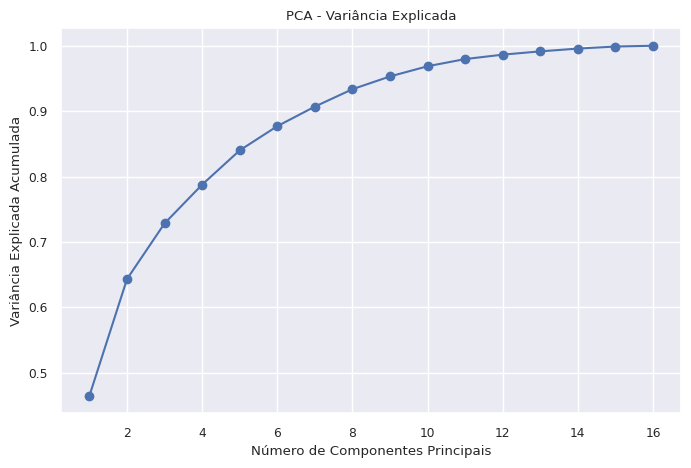

Contribuição das variáveis no PC1 e PC2:
                       PC1       PC2
curbweight        0.354708  0.022250
length            0.332106  0.135037
width             0.326723  0.055274
enginesize        0.318620 -0.072394
price             0.313025 -0.077193
wheelbase         0.293396  0.261536
horsepower        0.289342 -0.272478
bore              0.261754 -0.004922
height            0.113487  0.418474
stroke            0.052731  0.032235
compressionratio  0.018920  0.361383
normalizedlosses  0.016681 -0.334054
peakrpm          -0.081642 -0.369504
symboling        -0.090797 -0.408296
citympg          -0.300995  0.250402
highwaympg       -0.312279  0.200141


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# X_scaled é o DataFrame já padronizado
pca = PCA()
pca.fit(X_scaled)

# Variância explicada por componente
explained_var = pca.explained_variance_ratio_

# Plot da variância explicada acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker="o")
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Explicada Acumulada")
plt.title("PCA - Variância Explicada")
plt.grid(True)
plt.show()

# Contribuição de cada variável nos 2 primeiros componentes
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(explained_var))],
    index=X_scaled.columns
)
print("Contribuição das variáveis no PC1 e PC2:")
print(loadings.iloc[:, :2].sort_values("PC1", ascending=False))


### Interpretação dos Resultados da PCA

Variância explicada:
- O eixo X mostra o número de componentes principais (PCs).
- O eixo Y mostra a variância acumulada explicada por esses componentes.

Interpretação:
- PC1 + PC2 + PC3 já explicam aproximadamente 72% da variância da base.
- Com 5 PCs chegamos a aproximadamente 85%.
- Com 7 PCs já temos quase 90%, o que geralmente é ótimo para reduzir dimensionalidade.
- A curva mostra um “cotovelo” por volta do 3º a 5º componente, indicando que além disso os ganhos são marginais.

---

Cargas dos Componentes (loadings: PC1 e PC2):

PC1 (principal eixo da variabilidade)

Mais influentes positivamente:
- curbweight
- length
- width
- enginesize
- price
- horsepower

Mais influentes negativamente:
- citympg
- highwaympg

Interpretação:
- PC1 é um eixo de tamanho/potência/preço.
- Carros maiores, pesados, com motores grandes e caros ficam no extremo positivo.
- Carros pequenos, leves e econômicos ficam no extremo negativo.

PC2 (segundo eixo de variabilidade)

Mais influentes positivamente:
- height
- compressionratio
- wheelbase
- citympg

Mais influentes negativamente:
- symboling
- peakrpm
- normalizedlosses
- horsepower

Interpretação:
- PC2 parece capturar uma dimensão de eficiência versus risco/estilo de motor.
- Positivo: carros mais altos, com maior taxa de compressão e consumo urbano relativamente maior.
- Negativo: carros com maior rotação de pico, maior risco (symboling) e mais perdas normalizadas.

---

Insight geral:
- **PC1** separa os carros grandes/potentes/caros dos compactos/econômicos.
- **PC2** distingue carros por eficiência de motor e perfil de risco.
- Juntos, PC1 e PC2 permitem visualizar bem os grupos de veículos.

Isso reforça o que vimos no heatmap hierárquico:
- Existe um bloco de variáveis fortemente relacionadas ao tamanho e potência.
- E outro bloco de variáveis ligadas à eficiência e consumo.

### PCA com Target *Symboling*

Variância explicada:
PC1: 49.23% | PC2: 16.55% | Acumulada: 65.77%

Top variáveis por PC1 (em módulo):
                 PC1
curbweight  0.355731
length      0.330576
width       0.327169
enginesize  0.321335
highwaympg -0.316376
price       0.315967
citympg    -0.306107
horsepower  0.294992
wheelbase   0.288624
bore        0.263017

Top variáveis por PC2 (em módulo):
                       PC2
compressionratio  0.450351
peakrpm          -0.443202
height            0.430207
normalizedlosses -0.313466
horsepower       -0.280340
wheelbase         0.278518
citympg           0.266151
highwaympg        0.213733
length            0.157969
width             0.086288


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


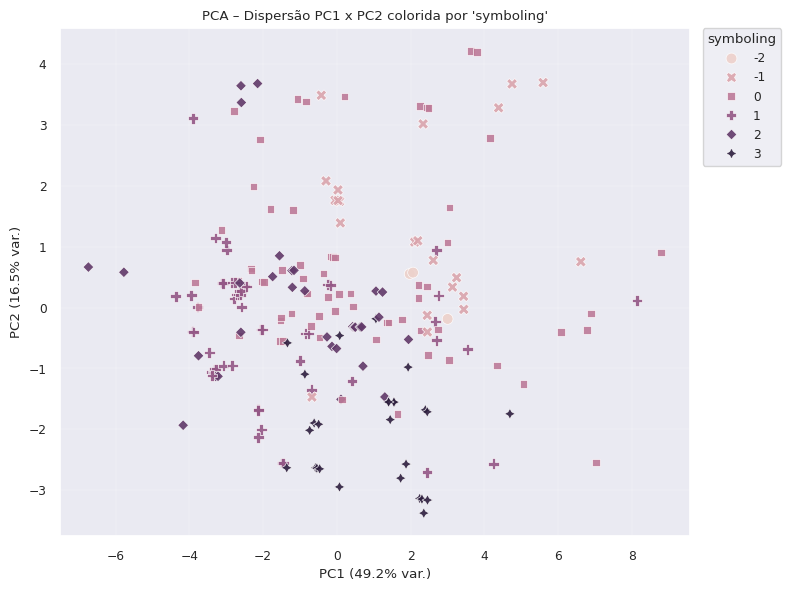


Centroides (médias em PC1 e PC2) por 'symboling':


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,PC1,PC2
symboling,,
-2,2.349706,0.313433
-1,2.163293,1.387523
0,0.657635,0.622764
1,-1.617673,-0.403380
2,-1.168797,0.082703
3,0.964917,-2.002036


In [ ]:
# 1) Seleção e preparo dos dados

# Garante que o target 'symboling' esteja presente
assert 'symboling' in data.columns, "Coluna 'symboling' não encontrada no DataFrame 'data'."

# Mantém apenas colunas numéricas (exceto o target) para a PCA
num_cols = data.select_dtypes(include=np.number).columns.tolist()
num_cols_no_target = [c for c in num_cols if c != 'symboling']

# Imputação (mediana) e padronização (média=0, desvio=1)
imputer = SimpleImputer(strategy="median")
X_num = pd.DataFrame(imputer.fit_transform(data[num_cols_no_target]),
                     columns=num_cols_no_target, index=data.index)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_num),
                        columns=num_cols_no_target, index=data.index)

# Remove linhas com target ausente
mask = data['symboling'].notna()
X_scaled = X_scaled.loc[mask]
y = data.loc[mask, 'symboling'].astype(int)

# 2) PCA

pca = PCA(n_components=2)  # para o gráfico PC1 x PC2
Z = pca.fit_transform(X_scaled)

pc_df = pd.DataFrame(Z, columns=['PC1', 'PC2'], index=X_scaled.index)
pc_df['symboling'] = y.values

expl_var = pca.explained_variance_ratio_  # variância explicada por PC

# Cargas (loadings) das variáveis nos PCs
loadings = pd.DataFrame(
    pca.components_.T,
    index=X_scaled.columns,
    columns=['PC1', 'PC2']
).sort_values('PC1', ascending=False)

print("Variância explicada:")
print(f"PC1: {expl_var[0]:.2%} | PC2: {expl_var[1]:.2%} | Acumulada: {(expl_var.sum()):.2%}\n")

print("Top variáveis por PC1 (em módulo):")
print(loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index).head(10)[['PC1']])
print("\nTop variáveis por PC2 (em módulo):")
print(loadings.reindex(loadings['PC2'].abs().sort_values(ascending=False).index).head(10)[['PC2']])

# 3) Gráfico PC1 x PC2 colorido por target

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pc_df, x='PC1', y='PC2', hue='symboling', style='symboling',
    s=60, edgecolor='white', linewidth=0.5, alpha=0.9
)

# Anota variância explicada nos eixos
plt.xlabel(f"PC1 ({expl_var[0]*100:.1f}% var.)")
plt.ylabel(f"PC2 ({expl_var[1]*100:.1f}% var.)")
plt.title("PCA – Dispersão PC1 x PC2 colorida por 'symboling'")
plt.legend(title="symboling", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.show()

# 4) Centroides por classe

centroids = pc_df.groupby('symboling')[['PC1','PC2']].mean()
print("\nCentroides (médias em PC1 e PC2) por 'symboling':")
display(centroids)

### Interpretação da PCA com Target *Symboling*

Variância Explicada:
- **PC1: 49,23%**
- **PC2: 16,55%**
- **Acumulada (PC1 + PC2): 65,77%**

Apenas 2 componentes já resumem **2/3 da variabilidade total** dos dados.

---

PC1 – Dimensão Tamanho/Potência x Eficiência:

- **Positivo:** `curbweight`, `length`, `width`, `enginesize`, `price`, `horsepower`
- **Negativo:** `citympg`, `highwaympg`

Interpretação:  
PC1 separa carros **maiores, mais pesados, potentes e caros** (lado positivo) versus **compactos, leves e econômicos** (lado negativo).

---

PC2 – Dimensão Eficiência/Construção x Risco Mecânico:

- **Positivo:** `compressionratio`, `height`, `wheelbase`, `citympg`
- **Negativo:** `peakrpm`, `normalizedlosses`, `horsepower`

Interpretação:  
PC2 diferencia carros **mais altos, eficientes e estáveis** (lado positivo) versus **carros com alta rotação, perdas e maior risco mecânico** (lado negativo).

---

Relação com o Target (*symboling*):

- **-2 e -1 (baixo risco):** PC1 positivo → carros **maiores e mais seguros**  
- **0 (risco neutro):** próximo à origem → perfil intermediário  
- **1 e 2 (risco moderado):** PC1 negativo → **compactos e econômicos**  
- **3 (alto risco):** PC1 positivo mas **PC2 muito negativo** → indicam **instabilidade estrutural/mecânica**

---

Insight Geral:
- **PC1** organiza os veículos pelo **porte, potência e preço**.  
- **PC2** adiciona nuances de **eficiência e risco mecânico**.  
- O *symboling* segue esse gradiente:  
  - **Carros maiores e caros → menor risco**  
  - **Carros compactos e econômicos → maior risco**  
  - **Symboling 3 → perfil de risco extremo, ligado a instabilidade mecânica**

---

> **Conclusão:** A PCA mostra que o risco de seguro `symboling` não é aleatório: ele se alinha com dimensões claras de porte/potência e eficiência mecânica dos veículos.

### Nota sobre Multicolinearidade

A Análise de Componentes Principais (PCA) mostrou como variáveis fortemente correlacionadas podem ser sintetizadas em combinações lineares que explicam grande parte da variância. Esse fenômeno está diretamente relacionado à **multicolinearidade**, que ocorre quando duas ou mais variáveis independentes apresentam alta correlação entre si.  

A multicolinearidade é relevante porque pode:  
1. Reduzir o poder preditivo das variáveis, já que parte da informação se torna redundante.  
2. Aumentar a incerteza das estimativas dos parâmetros (βᵢ), tornando os coeficientes menos estáveis e mais difíceis de interpretar.  

Por isso, antes de ajustar modelos de regressão, é fundamental avaliar a correlação entre as variáveis preditoras. Na próxima aula, veremos como diagnosticar e tratar a multicolinearidade com métricas específicas, como o **Fator de Inflação da Variância (VIF)**.  

> O **VIF (Variance Inflation Factor)** quantifica o quanto a variância de um coeficiente de regressão é inflacionada pela presença de multicolinearidade.